# Simulated Partially Stagnate Economy

## Problem

This simulation is an attempt to address the problem posed by Byran Caplan as follows:

'Suppose half of the sectors of the economy grow forever at 4%, while the rest completely stagnate.  I’m strongly tempted to say that this economy’s growth rate equals 2% forever.  Anyone tempted to disagree?'

## Assumptions

Based on the problem description, the assumptions about the hypothetical economy are as follows:

- Initially 50% of the sectors have zero growth.
- Initially 50% of the sectors grow at 4% annually.
- Initially the stagnate and non-stagnate sectors represent equal portions of GDP.
- The grow rates of the stagnate and non-stagnate sectors never change over time.
- The sectors never switch from stagnate to non-stagnate.
- Old sectors never disappear and new sectors never emerge.
- The grow rates are real rates of growth.

## Model

The GDP of the stagnate sectors remains the same over time. The GDP of the non-stagnate sectors grows at 4% annually.

The GDP of the non-stagnate sectors over a given number of years can be calculated using the formula for compound interest as follows:

The formula to calculate the amount of money at the end of an investment period with annual compounding is:

\$
A = P \times (1 + r)^t
\$

Where:

- **\$A\$** = the final amount of money (including principal and interest)
- **\$P\$** = the initial principal (starting amount)
- **\$r\$** = annual interest rate (in decimal form, e.g., 5% = 0.05)
- **\$t\$** = time the money is invested for, in years

In the model 
- **\$A\$** is the GDP of the non-stagnate sectors
- **\$P\$** is the initial GDP of the non-stagnate sectors
- **\$r\$** is the annual growth rate of the non-stagnate sectors
- **\$t\$** is the number of years to project to

At the end of any year the total GDP of the hypothetical economy is the sum of the stagnate and non-stagnate sectors.

## Execution

Below is code that implements the model and has parameters that can be changed to calculate the total GDP and growth rates for different numbers of years. The code also graphs the total annual GDP and total annual growth rate.

## Conclusion

Given the above and projecting out to 100 years, it appears the total growth rate of the hypothetical economy approaches the growth rate of the non-stagnate sectors. Every year the non-stagnate sectors grow and become a larger portion of the economy, eventually becoming almost the entire economy.

The conclusion provides a response to the following:

'Suppose toothpick production grows at 4% forever, and the rest of the economy stagnates.  Doesn’t your position imply that “economic growth” asymptotes to 4% despite near-total stagnation?'

The answer is yes, given enough time and the power of compounding growth.

## Code


In [7]:
# Helper function to calcuate stagnate and non-stagnate initial portions of total GDP

def calc_init_conditions(start_gdp, non_stagnate_portion):
    non_stagnate_gdp = start_gdp * non_stagnate_portion
    stagnate_gdp = start_gdp - non_stagnate_gdp
    return [stagnate_gdp, non_stagnate_gdp]

In [8]:
# Function that calculates the value of an investment at a fixed rate of interest
# that in the model is used to calcuate the GDP of the non-stagnate portion of the economy over time

def calc_value_compounded_investment(principal, rate, time):
    """
    Calculate the final amount of an investment with annual compounding.

    Parameters:
    principal (float): Initial amount of money invested
    rate (float): Annual interest rate (as a decimal, e.g., 5% = 0.05)
    time (int or float): Time the money is invested for, in years

    Returns:
    float: Final amount after compounding
    """
    final_amount = principal * (1 + rate) ** time
    return final_amount

In [9]:
# Helper function to calcuate the total growth rate of the economy.

def calc_growth_rate(start_gdp, end_gdp):
    return (end_gdp - start_gdp) / start_gdp

In [10]:
# Calculates the GDP of the non-stagnate portion of the economy over some number of years.
# If the number of years is 0, returns the value of the start_ns_gdp parameter.

def calc_ns_gdp(start_ns_gdp, growth_rate, num_years):
    return start_ns_gdp if num_years == 0 else calc_value_compounded_investment(start_ns_gdp, growth_rate, num_years)

In [11]:
# Function to 'simulate' the growth of an economy with a stagnate and non-stagnate portion,
# given the assumptions and model discussed above.
# Returns a tuple with a list of the total GDP for every year and a list of the total growth rate for every year.

def sim(num_years, start_gdp, non_stagnate_gr, non_stagnate_portion):
    init_conds = calc_init_conditions(start_gdp, non_stagnate_portion)
    
    stagnate_gdp = init_conds[0]
    print(f'Initial stagnate portion of GDP: {stagnate_gdp}')
    
    start_ns_gdp = init_conds[1]
    print(f'Initial non-stagnate portion of GDP: {start_ns_gdp}')
    
    gdps = [start_gdp]
    growth_rates = [0.0]
    
    current_total_gdp = start_gdp
    current_ns_gdp = start_ns_gdp
    
    for year in range(1, num_years+1):
        new_ns_gdp = calc_ns_gdp(current_ns_gdp, non_stagnate_gr, 1)
        new_total_gdp = stagnate_gdp + new_ns_gdp
        growth_rates.append(calc_growth_rate(current_total_gdp, new_total_gdp))
        gdps.append(new_total_gdp)
        current_total_gdp = new_total_gdp
        current_ns_gdp = new_ns_gdp

    
    return (gdps, growth_rates)        
    

In [12]:
# Runs the 'simulation' for the specifed number of years.

num_years = 100
initial_total_gdp = 1000
non_stagnate_growth_rate = 0.04
initial_non_stagnate_portion_of_economy = 0.5

results = sim(num_years, 1000, 0.04, 0.5)
print(f'GDP after {num_years} years: {results[0][-1]}')
print(f'Growth rate after {num_years} years: {results[1][-1]}')


Initial stagnate portion of GDP: 500.0
Initial non-stagnate portion of GDP: 500.0
GDP after 100 years: 25752.47409213479
Growth rate after 100 years: 0.039192937398030106


In [13]:
# Function to plot a list of values over time

import matplotlib.pyplot as plt

def plot_value_growth(years, values, plot_label, title, x_label, y_label):
    """
    Plot the growth of values over time.

    Parameters:
    years (list of int): List of years corresponding plot period.
    values (list of float): List of values for each year.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o', linestyle='-', label=plot_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

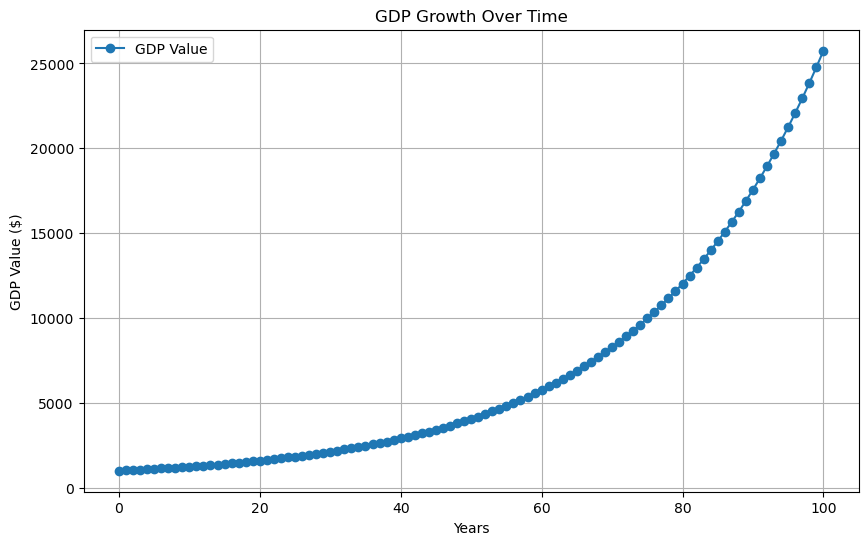

In [14]:
# GDP growth
plot_value_growth([x for x in range(num_years+1)], results[0], "GDP Value", "GDP Growth Over Time", "Years", "GDP Value ($)")

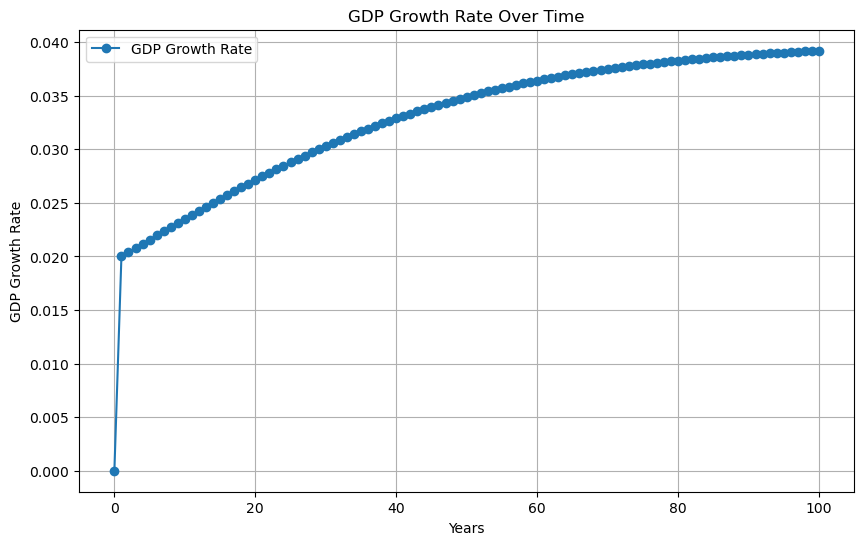

In [15]:
# Growth rate increase
plot_value_growth([x for x in range(num_years+1)], results[1], "GDP Growth Rate", "GDP Growth Rate Over Time", "Years", "GDP Growth Rate")